# Consensus Simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Graph

* Defined by $(\mathcal{V, E, A})$
* If $\mathcal{A}$ not provided, default a 0-1 graph 
* $a_{ii} = 0$ needed
* $[a_{ij}]$ must be non-negative
* $e_{ij} > 0$ needed 

## 1.1 Undirected Graph
* $\mathcal{E}$ only needed from one side
* symetry of $\mathcal{A}$ needed


In [2]:
from graph import *

V = tuple(range(5))
E = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 0)]
G_undir = UnDiGraph(V, E)

print(f"Number of nodes: {G_undir.graph.number_of_nodes()}")
print(f"{G_undir.graph.nodes()}")
print(f"Number of edges: {G_undir.graph.number_of_edges()}")
print(f"{G_undir.graph.edges()}")
print(f"Adjacency matrix:\n{G_undir.A}")
print(f"Graph balanced: {G_undir.balanced()}")
print(f"Graph strongly connected: {G_undir.strongly_connected()}")

Number of nodes: 5
[0, 1, 2, 3, 4]
Number of edges: 5
[(0, 1), (0, 4), (1, 2), (2, 3), (3, 4)]
Adjacency matrix:
[[0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0.]]
Graph balanced: True
Graph strongly connected: True


## 1.2 Directed Graph

In [3]:
V = tuple(range(3))
E = [(0, 1), (1, 2), (2, 3), (3, 0), (1, 0), (2, 1), (3, 2)]
A = np.array([[0, 1, 0, 0],
              [1, 0, 1, 0],
              [0, 1, 0, 1],
              [1, 0, 1, 0]])
G_dir = DiGraph(V, E, A)

print(f"Number of nodes: {G_dir.graph.number_of_nodes()}")
print(f"{G_dir.graph.nodes()}")
print(f"Number of edges: {G_dir.graph.number_of_edges()}")
print(f"{G_dir.graph.edges()}")
print(f"Adjacency matrix:\n{G_dir.A}")
print(f"Graph balanced: {G_dir.balanced()}")
print(f"Graph strongly connected: {G_dir.strongly_connected()}")

Number of nodes: 4
[0, 1, 2, 3]
Number of edges: 7
[(0, 1), (1, 2), (1, 0), (2, 3), (2, 1), (3, 0), (3, 2)]
Adjacency matrix:
[[0 1 0 0]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]]
Graph balanced: False
Graph strongly connected: True


# 2. Protocol

The base protocol
$$ u_i = \sum^N_{j=1} a_{ij} (x_j - x_i) $$


$$ u = (A - \text{diag}(A \cdot \textbf{1})) x  = -Lx $$

In [4]:
from protocol import *
p_dir = A1Protocol(G_dir)
x0 = np.array([1, 2, 2, 1])
u = p_dir(x0)

print(f"Protocol matrix:\n{p_dir.L}")
print(f"input for x0 = {x0}:")
print(f"{u}")

Protocol matrix:
[[ 1 -1  0  0]
 [-1  2 -1  0]
 [ 0 -1  2 -1]
 [-1  0 -1  2]]
input for x0 = [1 2 2 1]:
[ 1 -1 -1  1]


# 3. Consensus

Average consensus:
$$\alpha = \text{Avg}(x)$$

In [5]:
from consensus import *
a = np.array([1, 2, 3, 4])
b = Consensus("average")
print(f"Consensus {b.consensus_type} for {a}: {b(a)}")

Consensus average for [1 2 3 4]: 2.5


# 4. Multi-agent System

* A Dynamic Graph $G_d$ with dynamics
$$ \dot{x}_i = u_i $$
* requires $(\mathcal{G, P}, x_0)$


## 4.1 Continuous-time Simulation

* Fix or switching topology
* No communication time delay
* analytical integration with matrix exponential 
$$x(t) = \exp(-Lt) \cdot x_0$$

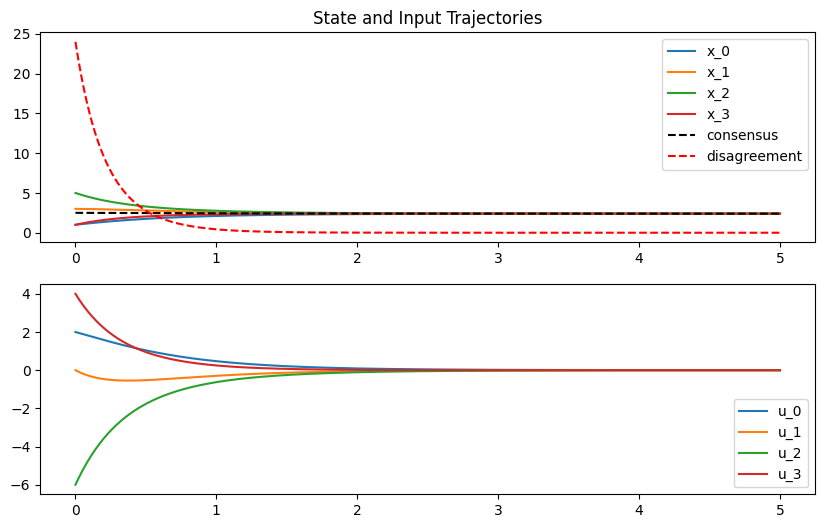

In [6]:
from dynamic_system import *

x0 = np.array([1, 3, 5, 1])
ds = MultiAgentSystem(G_dir, A1Protocol, x0)

dt = 0.01
t_e = 5
result = ds.simulate(t_e, dt)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.title("State and Input Trajectories")
for i in range(ds.n):
    plt.plot(result["time"], result["x"][i, :], label=f"x_{i}")
plt.plot(result["time"], result["consensus"], 'k--', label="consensus")
plt.plot(result["time"], result["disagreement"], 'r--', label="disagreement")
plt.legend()
plt.subplot(2, 1, 2)
for i in range(ds.n):   
    plt.plot(result["time"], result["u"][i, :], label=f"u_{i}")
    plt.legend()


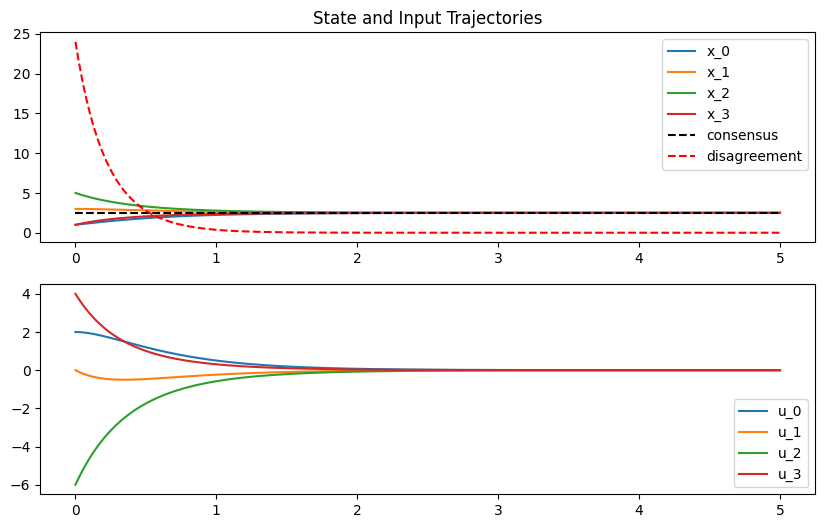

In [7]:
E = [(0, 1), (1, 2), (2, 3), (3, 0), (1, 0), (2, 1), (3, 2), (0, 3)]
A = np.array([[0, 1, 0, 1],
              [1, 0, 1, 0],
              [0, 1, 0, 1],
              [1, 0, 1, 0]])
G_new = DiGraph(V, E, A)
ds.switch_graph(G_new)

dt = 0.01
t_e = 5
result1 = ds.simulate(t_e, dt)
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.title("State and Input Trajectories")
for i in range(ds.n):
    plt.plot(result1["time"], result1["x"][i, :], label=f"x_{i}")
plt.plot(result1["time"], result1["consensus"], 'k--', label="consensus")
plt.plot(result1["time"], result1["disagreement"], 'r--', label="disagreement")
plt.legend()
plt.subplot(2, 1, 2)
for i in range(ds.n):   
    plt.plot(result1["time"], result1["u"][i, :], label=f"u_{i}")
    plt.legend()

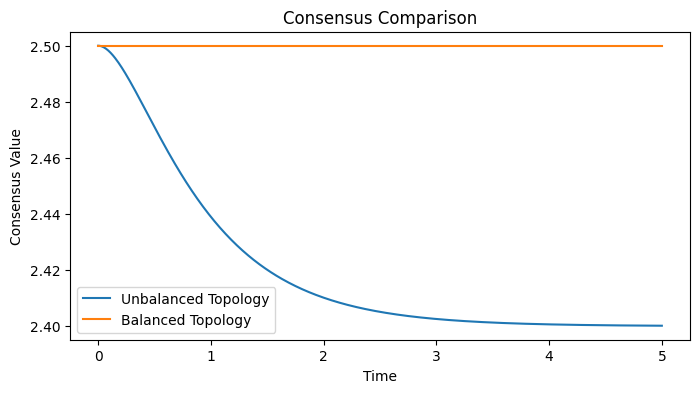

In [8]:
plt.figure(figsize=(8, 4))
plt.plot(result["time"], result["consensus"], label="Unbalanced Topology")
plt.plot(result1["time"], result1["consensus"], label="Balanced Topology")
plt.title("Consensus Comparison")
plt.xlabel("Time")
plt.ylabel("Consensus Value")
plt.legend()

## 4.2 Simulation with Communication Delay

* Euler integration
$$x(t+dt) = x(t) + u \cdot dt$$

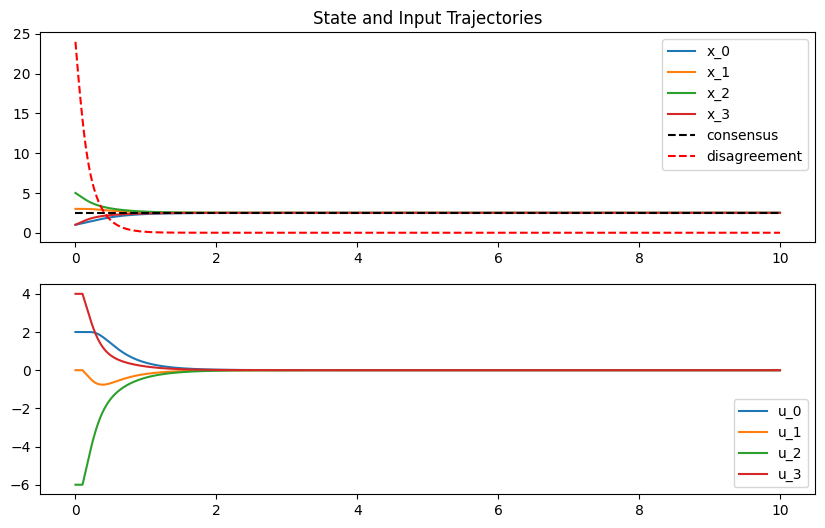

In [11]:
tau = np.ones((ds.n, ds.n)) * 0.1
ds.reset(np.array([1, 3, 5, 1], dtype=float))
resultd = ds.sim_delayed(t_e=10, tau=tau, dt=0.01)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.title("State and Input Trajectories")
for i in range(ds.n):
    plt.plot(resultd["time"], resultd["x"][i, :], label=f"x_{i}")
plt.plot(resultd["time"], resultd["consensus"], 'k--', label="consensus")
plt.plot(resultd["time"], resultd["disagreement"], 'r--', label="disagreement")
plt.legend()
plt.subplot(2, 1, 2)
for i in range(ds.n):   
    plt.plot(resultd["time"], resultd["u"][i, :], label=f"u_{i}")
    plt.legend()

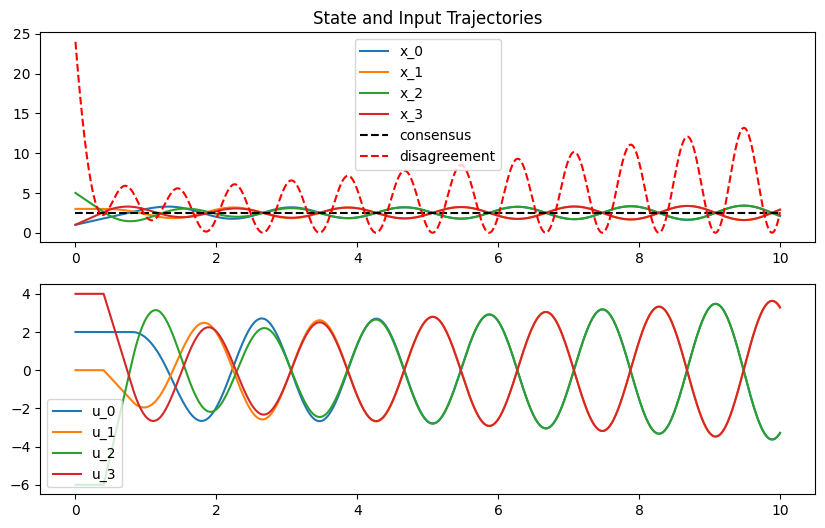

In [12]:
tau = np.ones((ds.n, ds.n)) * 0.4
ds.reset(np.array([1, 3, 5, 1], dtype=float))
resultd = ds.sim_delayed(t_e=10, tau=tau, dt=0.01)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.title("State and Input Trajectories")
for i in range(ds.n):
    plt.plot(resultd["time"], resultd["x"][i, :], label=f"x_{i}")
plt.plot(resultd["time"], resultd["consensus"], 'k--', label="consensus")
plt.plot(resultd["time"], resultd["disagreement"], 'r--', label="disagreement")
plt.legend()
plt.subplot(2, 1, 2)
for i in range(ds.n):   
    plt.plot(resultd["time"], resultd["u"][i, :], label=f"u_{i}")
    plt.legend()